In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch_adapter import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [6]:
cfg = get_whar_cfg(WHARDatasetID.UCI_HAR)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

dataset = PytorchAdapter(cfg, force_recompute)

2025-09-16 13:01:16,045 - whar-datasets - INFO - Running DownloadingStep
2025-09-16 13:01:16,045 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-09-16 13:01:16,046 - whar-datasets - INFO - Hash is up to date
2025-09-16 13:01:16,047 - whar-datasets - INFO - Running ParsingStep
2025-09-16 13:01:16,047 - whar-datasets - INFO - Checking hash for ParsingStep
2025-09-16 13:01:16,048 - whar-datasets - INFO - Hash is up to date
2025-09-16 13:01:16,048 - whar-datasets - INFO - Running WindowingStep
2025-09-16 13:01:16,049 - whar-datasets - INFO - Checking hash for WindowingStep
2025-09-16 13:01:16,050 - whar-datasets - INFO - Hash is up to date
2025-09-16 13:01:16,051 - whar-datasets - INFO - Loading windowing
2025-09-16 13:01:16,057 - whar-datasets - INFO - activity_ids from 0 to 5
2025-09-16 13:01:16,058 - whar-datasets - INFO - subject_ids from 0 to 29


In [8]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(
    batch_size=32, scv_group_index=0, force_recompute=False
)

2025-09-16 13:01:42,487 - whar-datasets - INFO - Running SamplingStep
2025-09-16 13:01:42,487 - whar-datasets - INFO - Checking hash for SamplingStep
2025-09-16 13:01:42,489 - whar-datasets - INFO - Hash is up to date
2025-09-16 13:01:42,489 - whar-datasets - INFO - Loading samples
Loading samples: 100%|██████████| 9499/9499 [00:01<00:00, 8716.00it/s] 
2025-09-16 13:01:43,641 - whar-datasets - INFO - train: 7201 | val: 801 | test: 1497


In [9]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{3: 0.8138457770732995, 0: 0.9484433478969606, 2: 0.982451276706015, 5: 1.0232168898473433, 1: 1.1008717430946864, 4: 1.131170965381696}


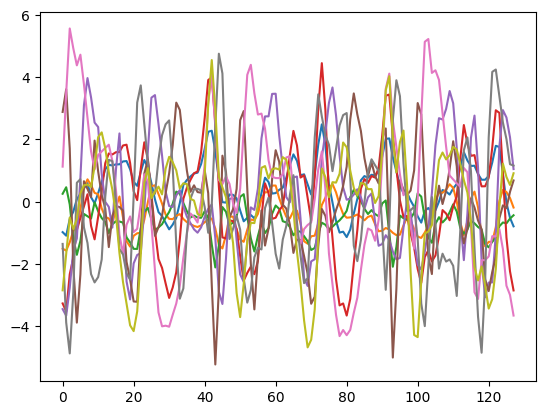

In [13]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()